# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


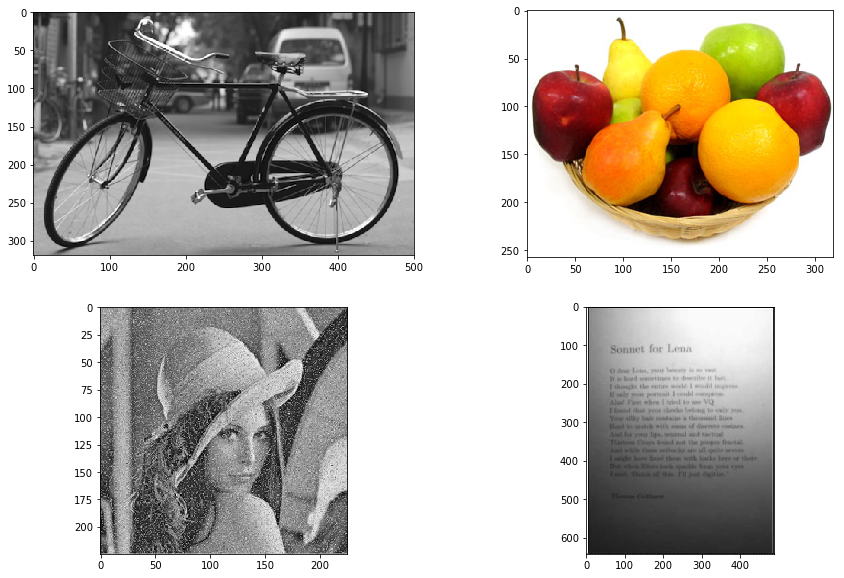

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


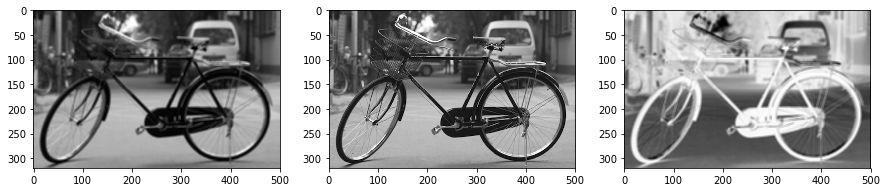

In [3]:
from scipy import ndimage
import numpy as np
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbyc, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-flt),cmap='gray')


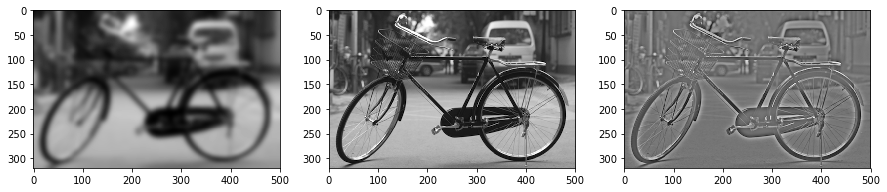

In [4]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')

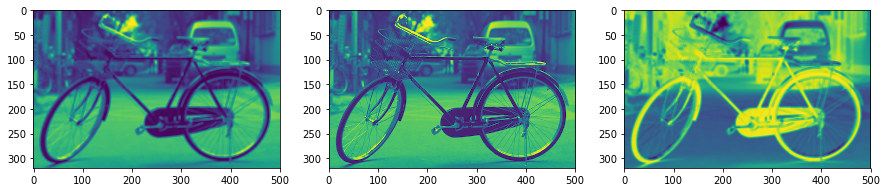

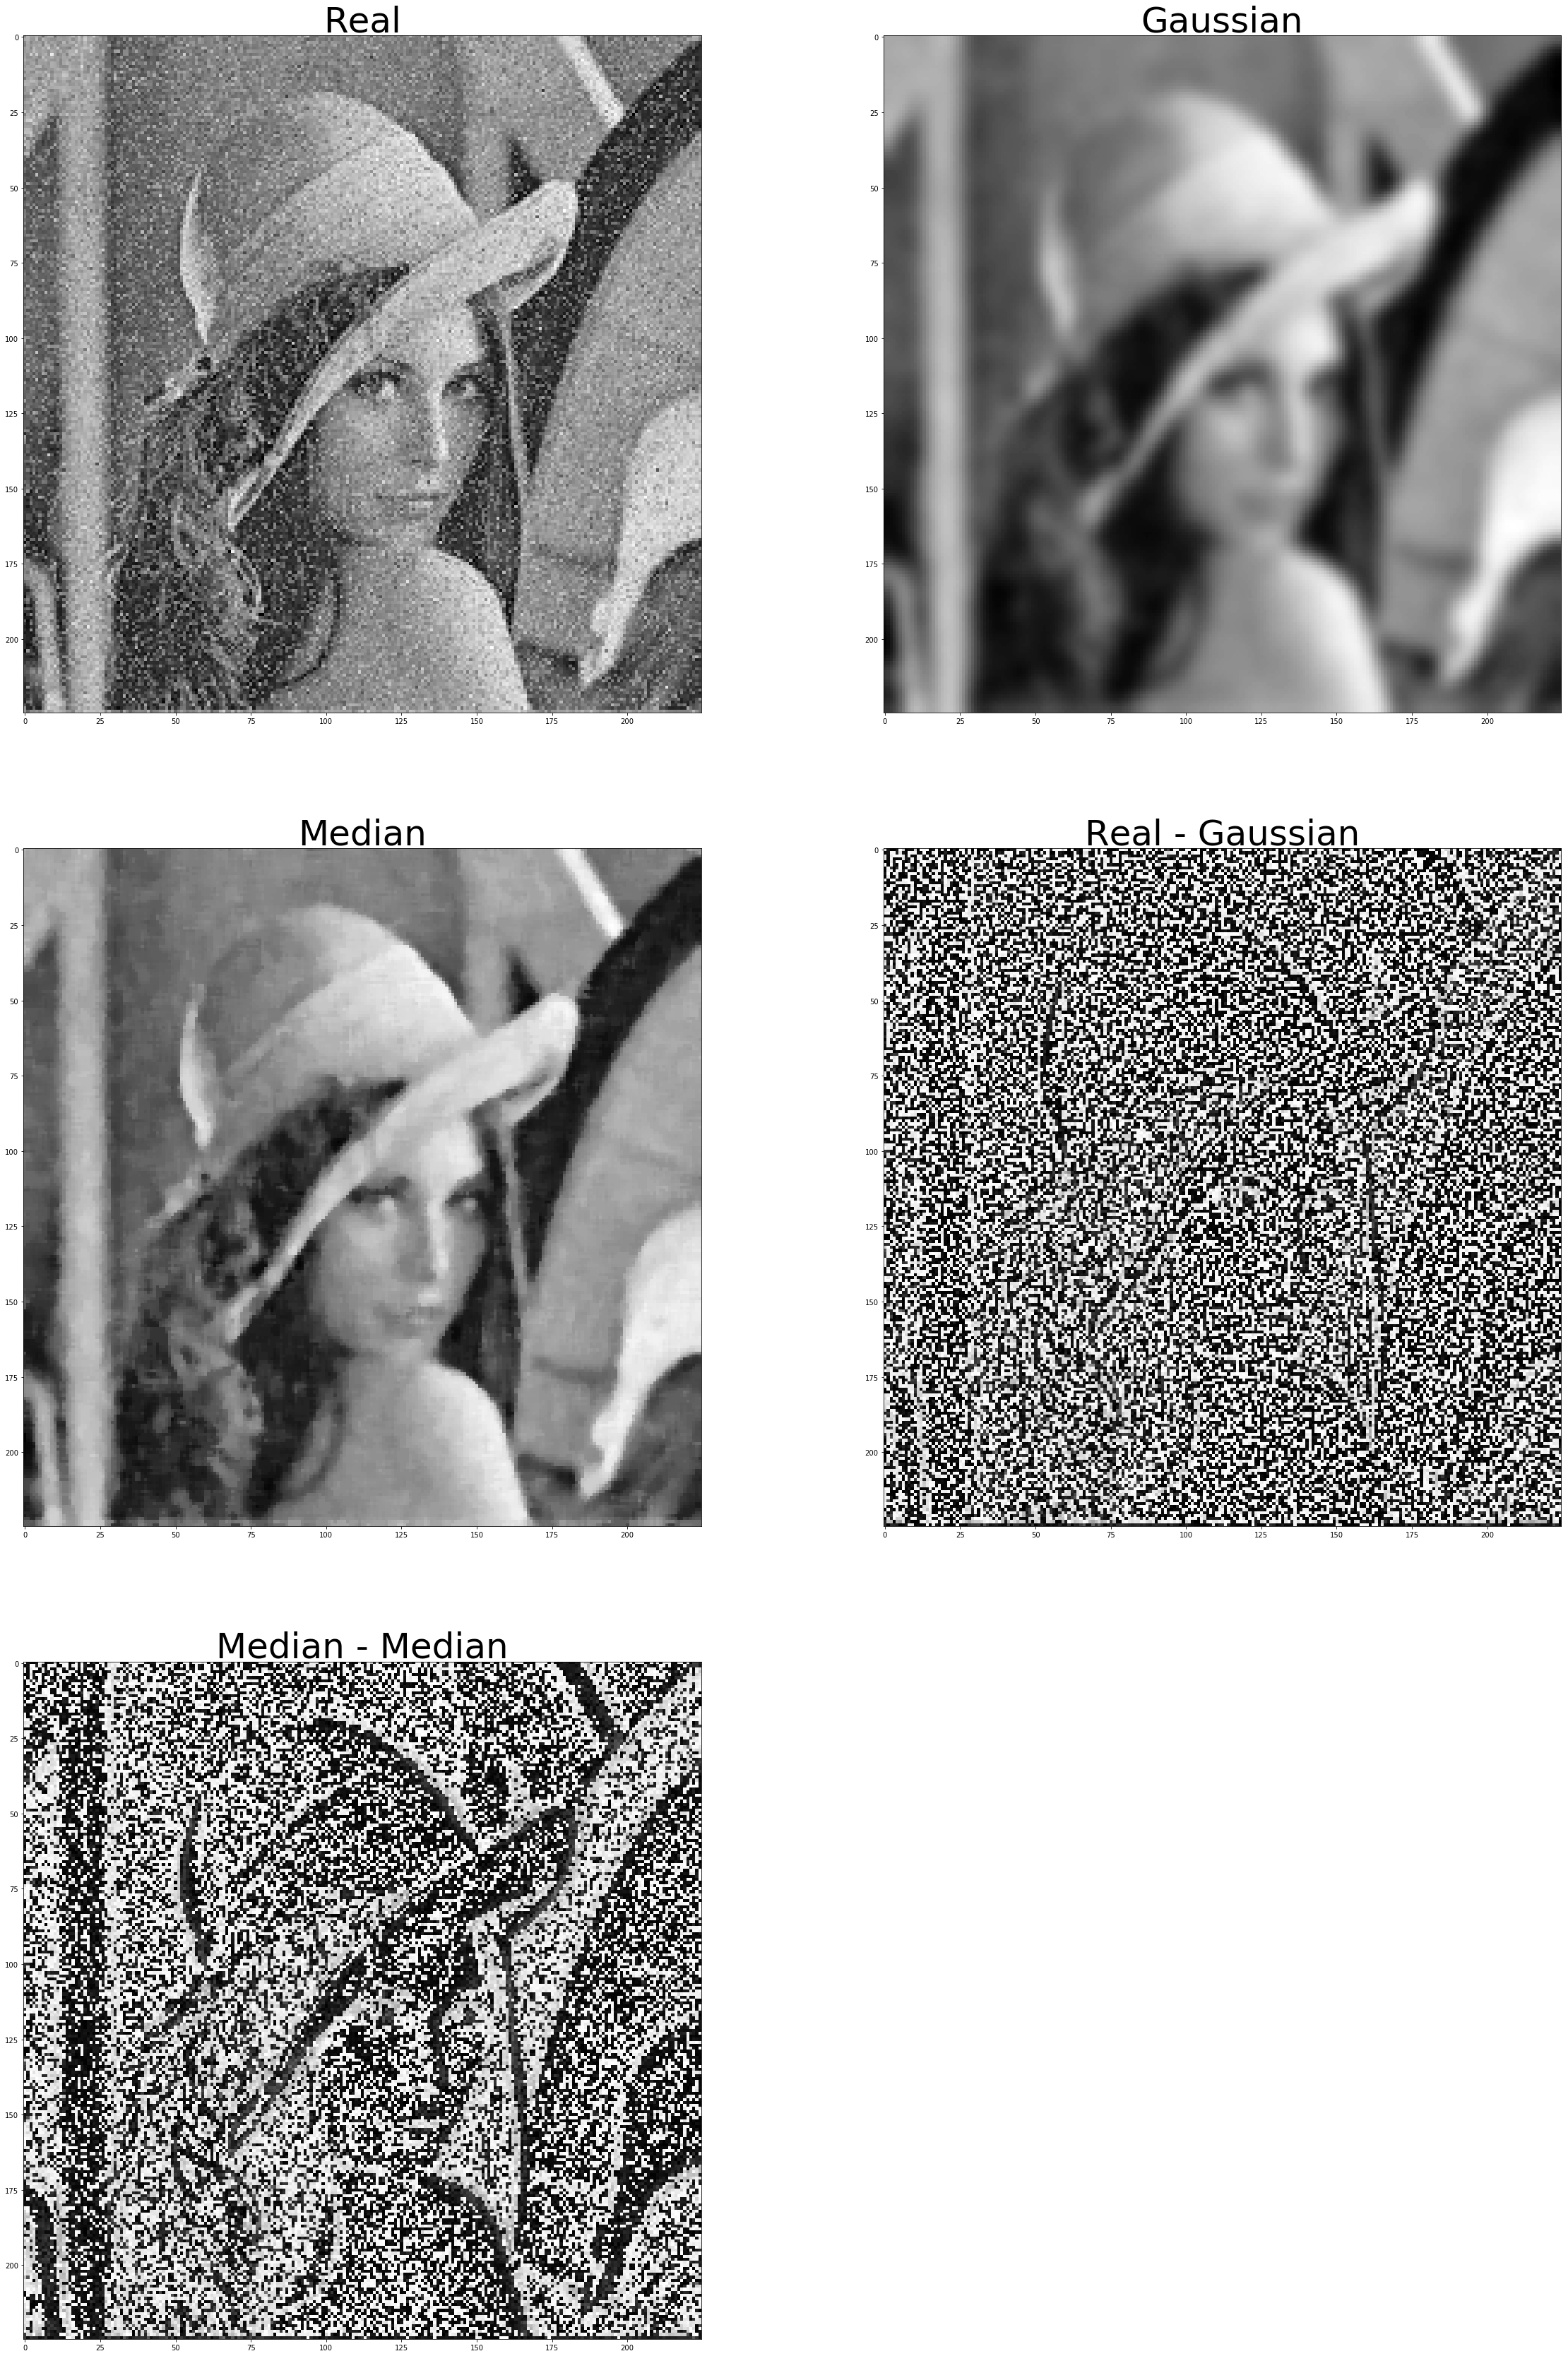

In [16]:
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as img
lena = Image.open('lena.jpg').convert('L')
fig = plt.figure(figsize= (40,60))

from scipy.ndimage.filters import gaussian_filter
gaus = gaussian_filter(lena, sigma =3)

from scipy.ndimage.filters import median_filter
med =median_filter(lena, size =5)

plt.subplot(321)
plt.imshow(lena,cmap='gray')
plt.title ('Real', fontsize = 50)
plt.subplot(322)
plt.imshow(gaus,cmap='gray')
plt.title ('Gaussian', fontsize = 50)
plt.subplot(323)
plt.imshow(med,cmap='gray')
plt.title ('Median', fontsize = 50)
plt.subplot(324)
plt.imshow(lena-med,cmap='gray')
plt.title ('Real - Gaussian', fontsize = 50)
plt.subplot(325)
plt.imshow(lena-gaus,cmap='gray' )
plt.title ('Median - Median', fontsize = 50)
plt.show()

0.728547
-0.827387


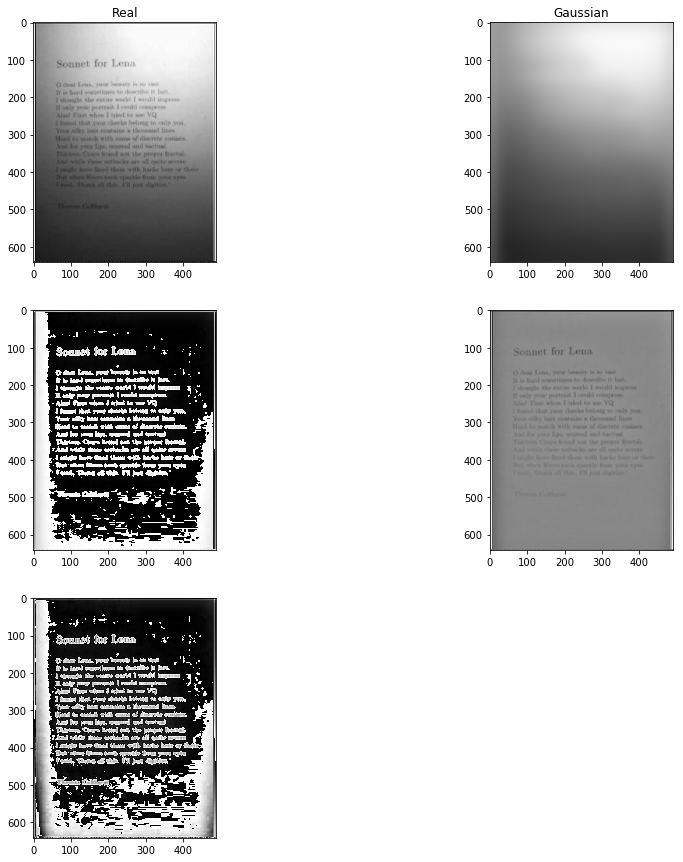

In [51]:
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
imbook = img.imread('./book.png')
fig = plt.figure(figsize= (15,15))

from scipy.ndimage.filters import gaussian_filter
gaus = gaussian_filter(imbook, sigma =20)

im3 = imbook-gaus;
im5 = np.log2(imbook)-np.log2(gaus);
min5 = np.min(im5)
max5 = np.max(im5)
plt.subplot(321)
plt.imshow(imbook,cmap='gray')
plt.title ('Real')
plt.subplot(322)
plt.imshow(gaus,cmap='gray')
plt.title ('Gaussian')
plt.subplot(323)
plt.imshow(im3,cmap='gray')
plt.subplot(324)
maxx=im3.max()
minn=im3.min()
print(maxx)
print(minn)
im4 = (im3 - minn)/(maxx - minn)
plt.imshow(im4,cmap='gray')
plt.subplot(325)
# im5 = (im5-min5)/(max5-min5)
plt.imshow(im5,cmap='gray')
plt.show()
